In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as sk
import skimage.filters as skf
from skimage import transform as tf

# Cross Entropy Loss
def fCE(yhat, y):
    return -np.mean(np.log(yhat[y==1]))
# Percent Correct
def fPC(yhat, y):
    return np.mean(y.argmax(axis=1) == yhat.argmax(axis=1))

def predictor(w, X):
    z = np.exp(X.dot(w))
    z_sum = np.sum(z, axis=1).reshape(-1, 1)
    yhat = z/z_sum
    return yhat

def SGD(w, X, y):
    yhat = predictor(w, X)
    n = y.shape[0]
    w = X.T.dot(yhat-y)/n
    return w

# Given training and testing data, learning rate epsilon, and a specified batch size,
# conduct stochastic gradient descent (SGD) to optimize the weight matrix W (785x10).
# Then return W.
def softmaxRegression (trainingImages, trainingLabels, testingImages, testingLabels, epsilon = None, batchSize = None):
    n = trainingLabels.shape[0]
    W = 0.01 * np.random.randn(785,10)
#     epochs = 100
#     for _ in range(epochs):
    for n_tilde in range(n // batchSize):
        mini_x = trainingImages[n_tilde*batchSize: (n_tilde+1)*batchSize]
        mini_y = trainingLabels[n_tilde*batchSize: (n_tilde+1)*batchSize] 
        W = W - epsilon*SGD(W, mini_x, mini_y)
    return W   

# def rotated(images, labels):
#     r = images.reshape((5000, 28, 28))
    
#     plt.imshow(r[10])
#     plt.show()
    
#     for i, _ in enumerate(r):
#         r[i] = sk.transform.rotate(r[i], angle=15)
        
#     plt.imshow(r[10])
#     plt.show()
        
#     r = r.reshape((5000, 784))
#     r = np.insert(r, 784, 1, axis=1)
#     images = np.insert(images, 784, 1, axis=1)
    
#     return (np.append(images,r,axis=0), np.append(labels,labels,axis=0))
     
    
# def scaled(images, labels):
#     s = images.reshape((5000, 28, 28))
    
#     for i, _ in enumerate(s):
#         # randomly assign scale factor?
#         s[i] = sk.transform.resize(sk.transform.rescale(s[i], scale=0.8, mode='constant'), (28,28))
        
#     s = s.reshape((5000, 784))
#     s = np.insert(s, 784, 1, axis=1)
#     images = np.insert(images, 784, 1, axis=1)
    
#     return (np.append(images,s,axis=0), np.append(labels,labels,axis=0))

# def gauss_noise(images, labels):
#     g = images.reshape((5000, 28, 28))
    
#     plt.imshow(g[10])
#     plt.show()
    
#     for i, _ in enumerate(g):
#         g[i] = skf.gaussian(g[i], sigma=0.2)
        
#     plt.imshow(g[10])
#     plt.show()
        
#     g = g.reshape((5000, 784))
#     g = np.insert(g, 784, 1, axis=1)
#     images = np.insert(images, 784, 1, axis=1)
    
#     return (np.append(images,g,axis=0), np.append(labels,labels,axis=0))
    
    
# def transl(images, labels):
#     g = images.reshape((5000, 28, 28))
    
#     for i, _ in enumerate(g[:30]):
#         r = np.random.randint(-1, 2, size=2)
        
#         buf = g[i, :r[0]]
#         temp = g[i, r[0]:]
#         g[i] = np.append(temp, buf, axis=0)
        
#         buf = g[i, :, :r[1]]
#         temp = g[i, :, r[1]:]
#         g[i] = np.append(temp, buf, axis=1)
        
#     g = g.reshape((5000, 784))
# #     g = np.insert(g, 784, 1, axis=1)
# #     images = np.insert(images, 784, 1, axis=1)
    
#     return (np.append(images,g,axis=0), np.append(labels,labels,axis=0))

def augmentation(images, labels, style):
    
    g = images.reshape((5000, 28, 28))
    
    for i, _ in enumerate(g):
        
        if style == 'rotate':
            g[i] = sk.transform.rotate(g[i], angle=15)
        elif style == 'scale':
            g[i] = sk.transform.resize(sk.transform.rescale(g[i], scale=0.8, mode='constant'), (28,28))
        elif style == 'gauss':
            g[i] = skf.gaussian(g[i], sigma=0.2)
        elif style == 'transl':
            r = np.random.randint(-1, 2, size=2)
            buf = g[i, :r[0]]
            temp = g[i, r[0]:]
            g[i] = np.append(temp, buf, axis=0)
            buf = g[i, :, :r[1]]
            temp = g[i, :, r[1]:]
            g[i] = np.append(temp, buf, axis=1)
        
    g = g.reshape((5000, 784))
    g = np.insert(g, 784, 1, axis=1)
    images = np.insert(images, 784, 1, axis=1)
    return (np.append(images,g,axis=0), np.append(labels,labels,axis=0))
            
def get_data():
    # Load data
    tr_im = np.load("small_mnist_train_images.npy")
    tr_lb = np.load("small_mnist_train_labels.npy")
    te_im = np.load("small_mnist_test_images.npy")
    te_lb = np.load("small_mnist_test_labels.npy")
    
    return (tr_im, tr_lb, te_im, te_lb)

In [2]:

# Load data
trainingImages = np.load("small_mnist_train_images.npy")
trainingLabels = np.load("small_mnist_train_labels.npy")
testingImages = np.load("small_mnist_test_images.npy")
testingLabels = np.load("small_mnist_test_labels.npy")

tr_im, tr_lb, te_im, te_lb = get_data()

rotate_im, rotate_lb = augmentation(tr_im, tr_lb, 'rotate')
scale_im, scale_lb = augmentation(tr_im, tr_lb, 'scale')
transl_im, transl_lb = augmentation(tr_im, tr_lb, 'transl')
gauss_im, gauss_lb = augmentation(tr_im, tr_lb, 'gauss')

# Append a constant 1 term to each example to correspond to the bias terms
tr_im = np.insert(tr_im, 784, 1, axis=1)
te_im = np.insert(te_im, 784, 1, axis=1)

print(transl_im.shape)

W = softmaxRegression(tr_im, tr_lb, te_im, te_lb, epsilon=0.1, batchSize=100)
print(fPC(predictor(W, te_im), te_lb))

W = softmaxRegression(transl_im, transl_lb, te_im, te_lb, epsilon=0.1, batchSize=100)
print(fPC(predictor(W, te_im), te_lb))

W = softmaxRegression(rotate_im, rotate_lb, te_im, te_lb, epsilon=0.1, batchSize=100)
print(fPC(predictor(W, te_im), te_lb))

W = softmaxRegression(scale_im, scale_lb, te_im, te_lb, epsilon=0.1, batchSize=100)
print(fPC(predictor(W, te_im), te_lb))

W = softmaxRegression(gauss_im, gauss_lb, te_im, te_lb, epsilon=0.1, batchSize=100)
print(fPC(predictor(W, te_im), te_lb))



(10000, 785)
0.7312
0.7574
0.7738
0.7716
0.7612


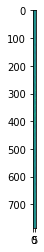

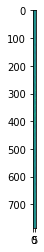

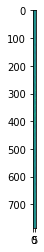

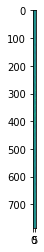

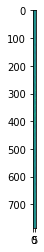

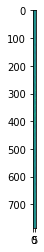

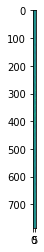

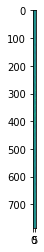

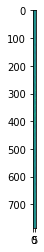

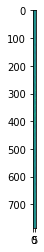

In [3]:
for w in W[:784].T:
    weight_image = w.reshape((28, 28))
    plt.imshow(W)
    plt.show()

In [38]:
i=1
for w in W[:784].T:
    print(i)
    i = i+1